In [8]:
# --------------------------
# Import Libraries
# --------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import statsmodels.api as sm


In [9]:
# Check available columns in the DataFrame
display(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [10]:
# --------------------------
# Load Dataset
# --------------------------
df = pd.read_csv("adult.csv")   # change path if needed

In [11]:
print(df.head())
print("\nShape:", df.shape)

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

In [12]:
df = df.replace("?", np.nan)

In [13]:
# Check missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Drop rows with missing values
df = df.dropna()


Missing values per column:
 age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


In [14]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print("Numeric columns:", list(num_cols))
print("Categorical columns:", list(cat_cols))

Numeric columns: ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
Categorical columns: ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']



Correlation Matrix:
                      age    fnlwgt  education.num  capital.gain  capital.loss  \
age             1.000000 -0.076511       0.043526      0.080154      0.060165   
fnlwgt         -0.076511  1.000000      -0.044992      0.000422     -0.009750   
education.num   0.043526 -0.044992       1.000000      0.124416      0.079646   
capital.gain    0.080154  0.000422       0.124416      1.000000     -0.032229   
capital.loss    0.060165 -0.009750       0.079646     -0.032229      1.000000   
hours.per.week  0.101599 -0.022886       0.152522      0.080432      0.052417   

                hours.per.week  
age                   0.101599  
fnlwgt               -0.022886  
education.num         0.152522  
capital.gain          0.080432  
capital.loss          0.052417  
hours.per.week        1.000000  


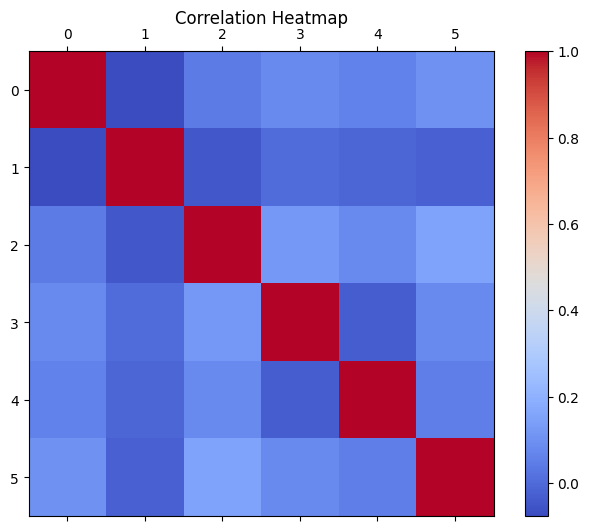

In [15]:
# --------------------------
# 1. Correlation Analysis
# --------------------------

# Correlation matrix
corr = df[num_cols].corr()
print("\nCorrelation Matrix:\n", corr)

# Plot heatmap
plt.figure(figsize=(8,6))
plt.matshow(corr, cmap="coolwarm", fignum=1)
plt.colorbar()
plt.title("Correlation Heatmap", pad=20)
plt.show()



Group-wise Means:
         hours.per.week  education.num
income                               
<=50K        39.348592       9.629116
>50K         45.706580      11.606420


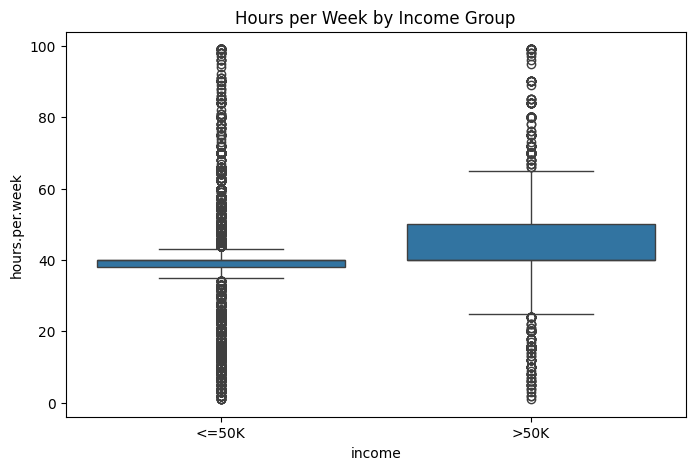

In [18]:
# --------------------------
# 2. Group Comparison (Boxplots)
# --------------------------
import seaborn as sns

# Grouped means
print("\nGroup-wise Means:\n", df.groupby("income")[["hours.per.week", "education.num"]].mean())

# Boxplot for hours worked per week by income
plt.figure(figsize=(8,5))
sns.boxplot(x="income", y="hours.per.week", data=df)
plt.title("Hours per Week by Income Group")
plt.show()


In [20]:
# --------------------------
# 3. Regression Analysis
# --------------------------

X = df[["education.num"]]   # predictor
y = df["hours.per.week"]    # response

X = sm.add_constant(X)  # add intercept
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         hours.per.week   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     718.3
Date:                Sat, 23 Aug 2025   Prob (F-statistic):          2.11e-156
Time:                        19:46:03   Log-Likelihood:            -1.1734e+05
No. Observations:               30162   AIC:                         2.347e+05
Df Residuals:                   30160   BIC:                         2.347e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            33.6788      0.279    120.689

In [21]:
# --------------------------
# 4. Outlier Detection
# --------------------------
outliers = pd.DataFrame()
for col in num_cols:
    outliers[col] = np.abs(zscore(df[col]))

outlier_rows = (outliers > 3).any(axis=1)
print("Number of outliers found:", outlier_rows.sum())

Number of outliers found: 2541


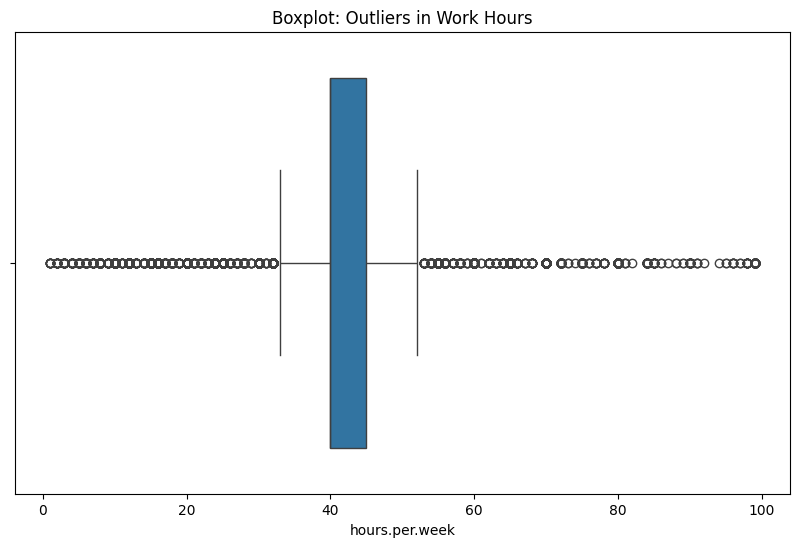

In [23]:
# Visualize Outliers
plt.figure(figsize=(10,6))
sns.boxplot(x=df["hours.per.week"])
plt.title("Boxplot: Outliers in Work Hours")
plt.show()